# **Escuela Politécnica Nacional**  
## **Nombre:** Liam Zúñiga  
## **Fecha:** 2025-01-04

# **[Actividad extracurricular 12] web scraping**

### **¿Qué es web scraping?**

El web scraping es una técnica que permite extraer información de sitios web de manera automatizada. También conocido como extracción de contenidos o recolección de datos web, esta práctica resulta fundamental para recopilar grandes volúmenes de datos directamente desde páginas en línea.

La esencia del web scraping radica en la capacidad de un software o script para navegar por páginas web, identificar los datos relevantes y extraerlos para su posterior análisis o almacenamiento. Estos datos pueden incluir texto, imágenes, tablas, enlaces, entre otros elementos. El objetivo es procesar esta información de manera más eficiente y rápida que la recopilación manual.

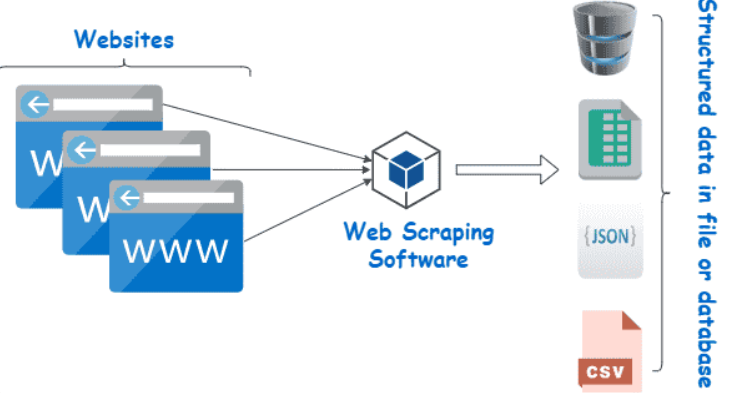

**¿Es ilegal?**


El web scraping, en esencia, no es ilegal, ya que generalmente implica extraer datos disponibles públicamente en sitios web. Por ejemplo, plataformas como Amazon publican precios accesibles al público, y scrapealos con fines de comparación de precios o análisis no infringe ninguna norma. De hecho, muchas aplicaciones y herramientas utilizan esta técnica para ofrecer servicios útiles, como garantizar que los usuarios obtengan los mejores precios.

Sin embargo, no todos los datos en la web están destinados al acceso público. La recopilación de información personal o protegida por derechos de propiedad intelectual puede considerarse una práctica indebida o incluso maliciosa. En estos casos, el web scraping puede derivar en problemas legales, como violaciones a leyes de privacidad o sanciones bajo normativas como la DMCA.

### **Prueba en python para dos librerías diferentes de un sitio web**

In [5]:
import requests
from bs4 import BeautifulSoup

# URL de la página de Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Encontrar la tabla principal
table = soup.find("table", {"class": "wikitable"})

# Extraer filas de la tabla
rows = table.find_all("tr")

print("Países y sus poblaciones (BeautifulSoup):")
for row in rows[1:]:  # Saltar la cabecera
    cols = row.find_all("td")
    if cols:
        country = cols[1].text.strip()  # Nombre del país
        population = cols[2].text.strip()  # Población
        print(f"{country}: {population}")

Países y sus poblaciones (BeautifulSoup):
World: 8,119,000,000
China: 1,409,670,000
1,402,737,000: 17.2%
United States: 340,110,988
Indonesia: 282,477,584
Pakistan: 241,499,431
Nigeria: 223,800,000
Brazil: 212,583,750
Bangladesh: 169,828,911
Russia: 146,150,789
Mexico: 130,154,247
Japan: 123,740,000
Philippines: 114,163,719
Ethiopia: 109,499,000
Democratic Republic of the Congo: 109,276,000
Egypt: 105,914,499
Vietnam: 100,309,210
Iran: 85,961,000
Turkey: 85,372,377
Germany: 84,746,132
France: 68,551,000
United Kingdom: 68,265,209
Thailand: 65,969,270
South Africa: 63,015,904
Tanzania: 61,741,120
Italy: 58,958,131
Colombia: 52,695,952
Kenya: 52,428,290
Myanmar: 51,316,756
South Korea: 51,248,233
Sudan: 50,448,963
Spain: 48,946,035
Argentina: 47,067,441
Algeria: 46,700,000
Uganda: 45,935,046
Iraq: 44,414,800
Afghanistan: 42,239,584
Canada: 41,465,298
Poland: 37,519,000
Uzbekistan: 37,355,356
Morocco: 36,828,330
Angola: 35,121,734
Malaysia: 34,112,400
Peru: 34,038,457
Ukraine: 33,443,000


In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess

# Lista para almacenar los resultados
results = []

# Definir el spider
class WikipediaSpider(scrapy.Spider):
    name = "wikipedia"
    start_urls = ["https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"]

    def parse(self, response):
        rows = response.xpath('//table[contains(@class, "wikitable")]/tbody/tr')

        for row in rows[1:]:  # Saltar la cabecera
            country = row.xpath("td[2]//text()").get().strip()
            population = row.xpath("td[3]//text()").get().strip()
            data = {"country": country, "population": population}
            results.append(data)  # Agregar datos a la lista
            yield data

# Configurar y ejecutar el proceso de Scrapy
process = CrawlerProcess()
process.crawl(WikipediaSpider)
process.start()

# Imprimir los resultados después de que el spider termine
print("Resultados del scraping:")
for item in results:
    print(f"{item['country']}: {item['population']}")


2025-01-03 21:43:31 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-01-03 21:43:31 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.11.7, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.11.0, Python 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)], pyOpenSSL 24.3.0 (OpenSSL 3.4.0 22 Oct 2024), cryptography 44.0.0, Platform Windows-11-10.0.22631-SP0
2025-01-03 21:43:31 [scrapy.addons] INFO: Enabled addons:
[]
2025-01-03 21:43:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2025-01-03 21:43:31 [scrapy.extensions.telnet] INFO: Telnet Password: 0e30b69d5270ebaf
2025-01-03 21:43:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2025-01-03 21:43:31 [scrapy.crawler] INFO: Overridden settings:
{}
2025-01-03 21:43:32 [scrapy.middleware] INFO: Enabled downloader mi

Resultados del scraping:
: 8,119,000,000
: 1,409,670,000
1,402,737,000: 17.2%
: 340,110,988
: 282,477,584
: 241,499,431
: 223,800,000
: 212,583,750
: 169,828,911
: 146,150,789
: 130,154,247
: 123,740,000
: 114,163,719
: 109,499,000
: 109,276,000
: 105,914,499
: 100,309,210
: 85,961,000
: 85,372,377
: 84,746,132
: 68,551,000
: 68,265,209
: 65,969,270
: 63,015,904
: 61,741,120
: 58,958,131
: 52,695,952
: 52,428,290
: 51,316,756
: 51,248,233
: 50,448,963
: 48,946,035
: 47,067,441
: 46,700,000
: 45,935,046
: 44,414,800
: 42,239,584
: 41,465,298
: 37,519,000
: 37,355,356
: 36,828,330
: 35,121,734
: 34,112,400
: 34,038,457
: 33,443,000
: 33,244,414
: 33,007,618
: 32,305,264
: 32,175,224
: 30,811,969
: 29,389,150
: 29,164,578
: 28,758,503
: 28,405,543
: 27,204,800
: 26,312,034
: 25,950,000
: 24,672,760
: 23,409,015
: 23,402,795
: 22,395,489
: 21,916,000
: 20,270,568
: 20,243,981
: 20,086,377
: 19,610,769
: 19,064,409
: 19,009,151
: 18,675,547
: 18,126,390
: 18,045,683
: 17,843,132
: 17,336,30

Las pruebas se hicieron a una página de Wikipedia por comodidad, por lo tanto estaría resuelto el tercer parámetro.

## **Bibliografía**

[1]	“¿Qué Es el Web Scraping? Cómo Extraer Legalmente el Contenido de la Web,” Kinsta®, 28-Jul-2022. [Online]. Available: https://kinsta.com/es/base-de-conocimiento/que-es-web-scraping/. [Accessed: 04-Jan-2025].


## **Enlace del repositorio de GitHub**
https://github.com/Riamu360/Actividad-extracurricular-12_web-scraping_LiamZ.git